In [7]:
from keras.datasets import mnist

(x_train, y_class_train), (x_test, y_class_test) = mnist.load_data()
print("학습셋 이미지 수 : %d 개" % (x_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (x_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


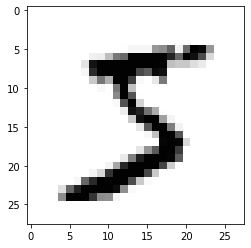

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18  18  18  126  136  175  26  166  255  247  127  0  0  0  0  
0  0  0  0  0  0  0  0  30  36  94  154  170  253  253  253  253  253  225  172  253  242  195  64  0  0  0  0  
0  0  0  0  0  0  0  49  238  253  253  253  253  253  253  253  253  251  93  82  82  56  39  0  0  0  0  0  
0  0  0  0  0  0  0  18  219  253  253  253  253  253  198  182  247  241  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80  156  107  253  253  205  11  0  43  154  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14  1  154  253

In [8]:
# 이미지 형태 출력을 위한 pyplot 모듈 import
import matplotlib.pyplot as plt
import sys
# 위 60000개 데이터 배열에서 0번째 원소를 흑백으로 출력
plt.imshow(x_train[0], cmap='Greys')
plt.show()

# 0번째 원소의 모든 데이터를 출력
for x in x_train[0]:
    for i in x:
        sys.stdout.write('%d  ' % i)
    sys.stdout.write('\n')

print(x_train[0][0]) # 첫번째 줄 출력
print(y_class_train[0]) #0번 원소의 클래스(라벨링) 정보

In [9]:
# 딥러닝에 필요한 케라스 함수 호출
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

# 필요 라이브러리 호출
import numpy
import tensorflow as tf

# 데이터 셋 호출
from keras.datasets import mnist

# 실행 시마다 같은 결과값 도출을 위한 시드 설정
numpy.random.seed(0)
tf.random.set_seed(0)

# 데이터를 불러와서 각 변수에 저장
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 학습에 적합한 형태로 데이터 가공
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32') / 255

# 클래스를 학습에 이용하기 위해 데이터 가공
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# 딥러닝 모델 구조 설정(2개층, 512개의 뉴런 연결, 10개 클래스 출력 뉴런, 784개 픽셀 input 값, relu와 softmax 활성화 함수 이용)
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 딥러닝 구조 설정(loss 옵션을 다중 클래스에 적합한 categorical_crossentropy, 옵티마이저는 adam 설정)
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# 모델 실행(x_test, y_test로 검증, 128개씩 10번 학습)
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128, verbose=2)

# 학습 정확도, 검증 정확도 출력
print('\nAccuracy: {:.4f}'.format(model.evaluate(x_train, y_train)[1]))
print('\nVal_Accuracy: {:.4f}'.format(model.evaluate(x_test, y_test)[1]))

# 모델 저장
model.save('Predict_Model.h5')

Epoch 1/10
469/469 - 5s - loss: 0.2670 - accuracy: 0.9256 - val_loss: 0.1425 - val_accuracy: 0.9573 - 5s/epoch - 11ms/step
Epoch 2/10
469/469 - 4s - loss: 0.1075 - accuracy: 0.9685 - val_loss: 0.0918 - val_accuracy: 0.9731 - 4s/epoch - 9ms/step
Epoch 3/10
469/469 - 4s - loss: 0.0698 - accuracy: 0.9794 - val_loss: 0.0768 - val_accuracy: 0.9761 - 4s/epoch - 9ms/step
Epoch 4/10
469/469 - 4s - loss: 0.0490 - accuracy: 0.9857 - val_loss: 0.0730 - val_accuracy: 0.9763 - 4s/epoch - 9ms/step
Epoch 5/10
469/469 - 4s - loss: 0.0372 - accuracy: 0.9891 - val_loss: 0.0671 - val_accuracy: 0.9790 - 4s/epoch - 9ms/step
Epoch 6/10
469/469 - 4s - loss: 0.0270 - accuracy: 0.9925 - val_loss: 0.0632 - val_accuracy: 0.9795 - 4s/epoch - 9ms/step
Epoch 7/10
469/469 - 5s - loss: 0.0205 - accuracy: 0.9945 - val_loss: 0.0604 - val_accuracy: 0.9820 - 5s/epoch - 10ms/step
Epoch 8/10
469/469 - 4s - loss: 0.0153 - accuracy: 0.9962 - val_loss: 0.0625 - val_accuracy: 0.9816 - 4s/epoch - 9ms/step
Epoch 9/10
469/469 - 6

In [40]:
# 딥러닝에 필요한 케라스 함수 호출
from keras.models import load_model
from keras.utils import np_utils
from google.colab.patches import cv2_imshow

# 필요 라이브러리 호출(PIL은 이미지파일 처리위함)
from PIL import Image
import numpy as np
import cv2

# test.png는 그림판에서 붓으로 숫자 8을 그린 이미지 파일
# test.png 파일 열어서 L(256단계 흑백이미지)로 변환
#img = Image.open("test8.png").convert("L")
img = cv2.imread('test0.png')
pil_Image = Image.fromarray(img)
cv2_imshow(img)

# 이미지를 784개 흑백 픽셀로 사이즈 변환
img = np.resize(img, (1, 784))

# 데이터를 모델에 적용할 수 있도록 가공
test_data = ((np.array(img) / 255) - 1) * -1

# 모델 불러오기
model = load_model('Predict_Model.h5')

# 클래스 예측 함수에 가공된 테스트 데이터 넣어 결과 도출
#res = model.predict_classes(test_data)
# 2021/10/02 수정 - 오류시 아래 명령어로 대체 가능합니다.
res =(model.predict(test_data) > 0.5).astype("int16")

print(res)

1/1 [==============================] - 0s 49ms/step
[[False False  True False False False False False False False]]
